In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load the dataset
accepted = pd.read_csv("accepted_2007_to_2018Q4.csv")

C:\Softwares\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rejected = pd.read_csv("rejected_2007_to_2018Q4.csv")

In [4]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [6]:
# EDA
accepted.info()
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
Amount Requested        float64
Application Date        object
Loan Title              object
Risk_Score              float64
Debt-To-Income Ratio    object
Zip Code                object
State                   object
Employment Length       object
Policy Code             float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [7]:
accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [8]:
accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [9]:
accepted.select_dtypes('object').nunique() 

id                           2260701
term                               2
grade                              7
sub_grade                         35
emp_title                     512694
emp_length                        11
home_ownership                     6
verification_status                3
issue_d                          139
loan_status                        9
pymnt_plan                         2
url                          2260668
desc                          124501
purpose                           14
title                          63155
zip_code                         956
addr_state                        51
earliest_cr_line                 754
initial_list_status                2
last_pymnt_d                     136
next_pymnt_d                     106
last_credit_pull_d               141
application_type                   2
verification_status_joint          3
sec_app_earliest_cr_line         663
hardship_flag                      2
hardship_type                      1
h

In [10]:
accepted.isnull().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

Text(0.5, 1.0, 'Loan Term Distribution')

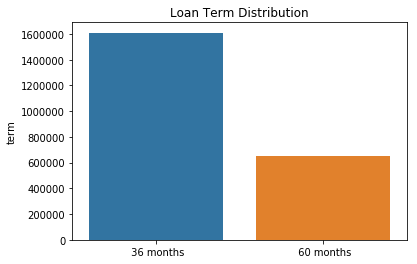

In [11]:
sns.barplot(y=accepted.term.value_counts(), x=accepted.term.value_counts().index)
plt.title("Loan Term Distribution")

Text(0.5, 1.0, 'Grade Distribution')

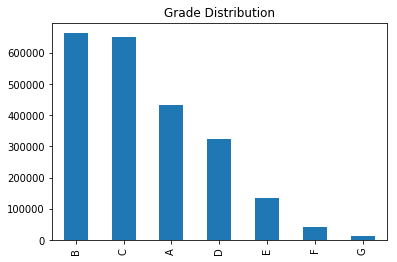

In [12]:
accepted.grade.value_counts().plot(kind="bar")
plt.title("Grade Distribution")

Text(0.5, 1.0, 'Loan Purpose')

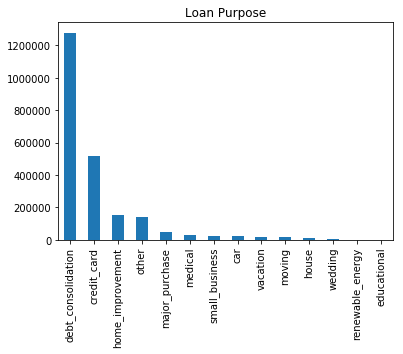

In [13]:
accepted.purpose.value_counts().plot(kind="bar")
plt.title("Loan Purpose")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

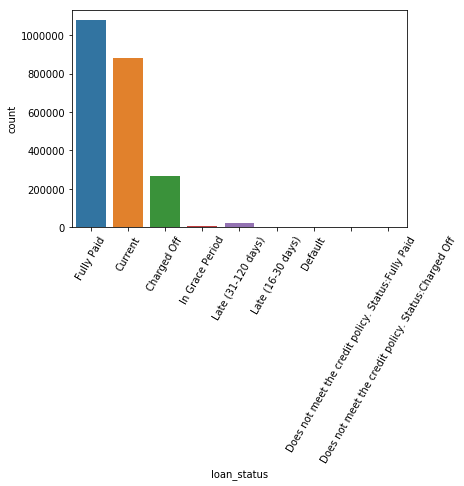

In [14]:
sns.countplot(accepted['loan_status'])
plt.xticks(rotation=60)

In [15]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Drop columns with more than 95% of empty values
df1 = accepted.dropna(thresh=accepted.shape[0]*0.95,how='all',axis=1)
df1.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,MORTGAGE,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [23]:
#Drop columns that are not important in predicting loan status
df1 = df1.drop(['id', 'url', 'zip_code'], axis=1)
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,MORTGAGE,110000.0,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [24]:
df1['title'].value_counts()

Debt consolidation                     1153293
Credit card refinancing                 469691
Home improvement                        137437
Other                                   127714
Major purchase                           44840
Medical expenses                         25388
Business                                 20804
Car financing                            20526
Debt Consolidation                       15763
Vacation                                 14443
Moving and relocation                    13800
Home buying                              12714
Consolidation                             5385
debt consolidation                        4837
Debt Consolidation Loan                   3804
Credit Card Consolidation                 2360
consolidation                             2175
Personal Loan                             2133
Consolidation Loan                        1778
Home Improvement                          1773
Credit Card Refinance                     1468
Credit Card P

In [25]:
#Uneccessary column for analysis
df1 = df1.drop(['title'], axis=1)
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,MORTGAGE,110000.0,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [26]:
df1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                      2
grade                     7
sub_grade                35
home_ownership            6
verification_status       3
issue_d                 139
loan_status               9
pymnt_plan                2
purpose                  14
addr_state               51
earliest_cr_line        754
initial_list_status       2
last_pymnt_d            136
last_credit_pull_d      141
application_type          2
hardship_flag             2
disbursement_method       2
debt_settlement_flag      2
dtype: int64

In [ ]:
#Convert issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d to datetime objects
df1.issue_d=pd.to_datetime(df1.issue_d)
#Extract the year from datetime objects
temp=pd.to_datetime(df1.earliest_cr_line)
df1.earliest_cr_line=temp.dt.year
df1.last_pymnt_d=pd.to_datetime(df1.last_pymnt_d)
df1.last_credit_pull_d=pd.to_datetime(df1.last_credit_pull_d)

In [0]:
df1['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [0]:
df1.select_dtypes('object').nunique() 

term                     2
grade                    7
sub_grade               35
home_ownership           6
verification_status      3
loan_status              9
pymnt_plan               2
purpose                 14
addr_state              51
initial_list_status      2
application_type         2
hardship_flag            2
disbursement_method      2
debt_settlement_flag     2
dtype: int64

In [0]:
# One Hot Encoding for categorical variables 
one_hot = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
df1 = pd.get_dummies(data=df1, columns = one_hot, drop_first=True)

In [0]:
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,loan_status,title,dti,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,2015-12-01,Fully Paid,Debt consolidation,5.91,...,0,0,0,0,0,1,0,0,0,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,2015-12-01,Fully Paid,Business,16.06,...,0,0,0,0,0,1,0,0,0,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,2015-12-01,Fully Paid,NaN,10.78,...,0,0,0,0,0,1,1,0,0,0
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,2015-12-01,Current,Debt consolidation,17.06,...,0,0,0,0,0,1,0,0,0,0
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,2015-12-01,Fully Paid,Major purchase,25.37,...,0,0,0,0,0,1,0,0,0,0


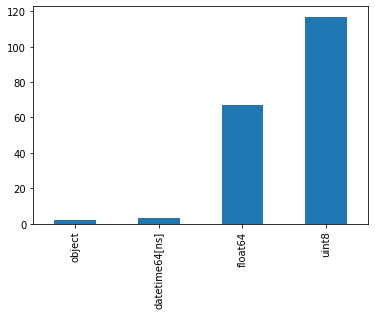

In [0]:
df1.dtypes.value_counts().sort_values().plot(kind='bar')

In [0]:
df1.dtypes.value_counts().sort_values()

object              2
datetime64[ns]      3
float64            67
uint8             117
dtype: int64

In [0]:
df1.isnull().sum()

loan_amnt                                 33
funded_amnt                               33
funded_amnt_inv                           33
int_rate                                  33
installment                               33
annual_inc                                37
issue_d                                   33
loan_status                               33
dti                                     1744
delinq_2yrs                               62
earliest_cr_line                          62
fico_range_low                            33
fico_range_high                           33
inq_last_6mths                            63
open_acc                                  62
pub_rec                                   62
revol_bal                                 33
revol_util                              1835
total_acc                                 62
out_prncp                                 33
out_prncp_inv                             33
total_pymnt                               33
total_pymn

In [0]:
#Remove rows with NA values
df2 = df1.dropna()
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,loan_status,dti,delinq_2yrs,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,2015-12-01,Fully Paid,5.91,0.0,...,0,0,0,0,0,1,0,0,0,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,2015-12-01,Fully Paid,16.06,1.0,...,0,0,0,0,0,1,0,0,0,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,2015-12-01,Fully Paid,10.78,0.0,...,0,0,0,0,0,1,1,0,0,0
3,35000.0,35000.0,35000.0,14.85,829.90,110000.0,2015-12-01,Current,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,2015-12-01,Fully Paid,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2137074 entries, 0 to 2260697
Columns: 189 entries, loan_amnt to debt_settlement_flag_Y
dtypes: datetime64[ns](3), float64(67), object(2), uint8(117)
memory usage: 1.4+ GB


In [0]:
# Sampling: take a random 10% sample of the dataframe
df_s = df2.sample(frac=0.1, replace=False, random_state=1)

In [0]:
df_s.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,loan_status,title,dti,...,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
1907461,10000.0,10000.0,10000.0,11.14,328.06,30000.0,2012-09-01,Fully Paid,Consolidation Loan,21.08,...,0,0,0,0,0,0,0,0,0,0
1294968,15000.0,15000.0,15000.0,17.57,377.41,92000.0,2014-04-01,Fully Paid,Debt consolidation,22.70,...,0,0,0,0,0,0,0,0,0,0
1829909,30000.0,30000.0,30000.0,19.52,786.83,160000.0,2013-07-01,Fully Paid,credit p/o,14.38,...,0,0,0,0,0,1,0,0,0,0
975250,28000.0,28000.0,28000.0,25.49,829.91,145000.0,2017-04-01,Current,Major purchase,17.15,...,0,0,0,0,0,1,0,0,0,0
135012,13000.0,13000.0,13000.0,6.24,396.91,98000.0,2015-09-01,Fully Paid,Credit card refinancing,26.43,...,0,0,0,0,0,0,0,0,0,0


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

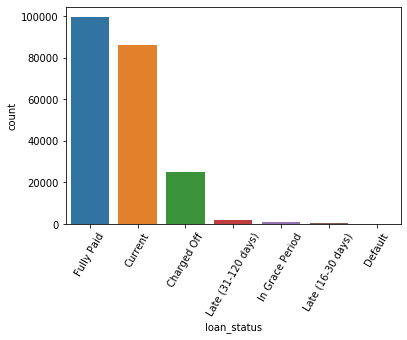

In [0]:
#Distribution of loan status from our random sample
sns.countplot(df_s['loan_status'])
plt.xticks(rotation=60)

In [0]:
# Convert response variable so there are 2 categories: good loan and bad loan
# Remove 'loan_status' and other datetime objects 
X = df_s.drop(['loan_status', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis = 1)
Y = df_s['loan_status']
Y = Y.isin(['Current', 'Fully Paid', 'In Grace Period']).astype('int')
Y.value_counts()


1    188309
0     27697
Name: loan_status, dtype: int64

In [0]:
#Now we try a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print the accuracy score as well as the classification report to observe f1-score
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      5513
           1       0.98      1.00      0.99     37689

    accuracy                           0.99     43202
   macro avg       0.99      0.94      0.96     43202
weighted avg       0.99      0.99      0.98     43202

0.9850701356418684


In [0]:
#Look at the importance of each feature within our model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 23 (0.160722)
2. feature 27 (0.147449)
3. feature 26 (0.128377)
4. feature 24 (0.119733)
5. feature 20 (0.051482)
6. feature 25 (0.035576)
7. feature 17 (0.034942)
8. feature 16 (0.029686)
9. feature 19 (0.024601)
10. feature 182 (0.023067)
11. feature 18 (0.022555)
12. feature 0 (0.020336)
13. feature 4 (0.013235)
14. feature 1 (0.013224)
15. feature 2 (0.012223)
16. feature 21 (0.010114)
17. feature 22 (0.009056)
18. feature 3 (0.007165)
19. feature 6 (0.004030)
20. feature 36 (0.003981)
21. feature 64 (0.003912)
22. feature 33 (0.003883)
23. feature 8 (0.003838)
24. feature 13 (0.003677)
25. feature 5 (0.003644)
26. feature 40 (0.003644)
27. feature 62 (0.003458)
28. feature 35 (0.003399)
29. feature 9 (0.003392)
30. feature 63 (0.003375)
31. feature 14 (0.003358)
32. feature 37 (0.003347)
33. feature 32 (0.003282)
34. feature 66 (0.003255)
35. feature 15 (0.003068)
36. feature 44 (0.002947)
37. feature 34 (0.002814)
38. feature 65 (0.002807)
39. feature 

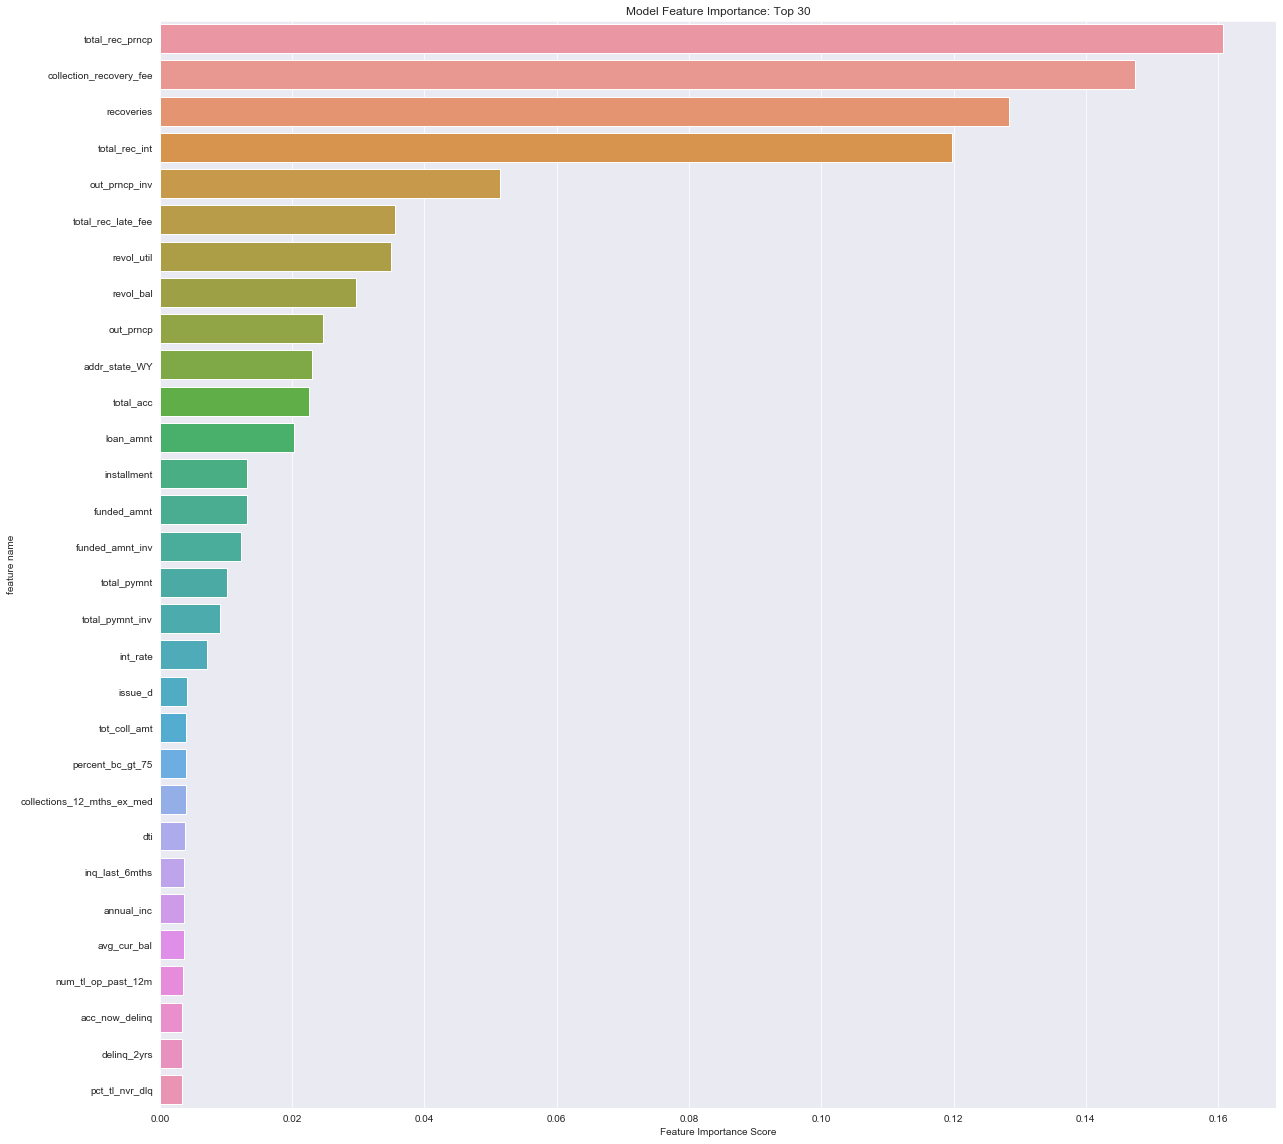

In [0]:
features = df_s.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
indices_30 = indices[0:30]

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x=importances[indices_30], y=features[indices_30], ax=ax)
ax.set_title("Model Feature Importance: Top 30")
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("feature name")
plt.show()


In [0]:
from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(n_estimators=100)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred2.round()))
print(accuracy_score(y_test, y_pred2.round()))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      5513
           1       0.98      1.00      0.99     37689

    accuracy                           0.98     43202
   macro avg       0.98      0.94      0.96     43202
weighted avg       0.98      0.98      0.98     43202

0.9817369566223786


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

model3 = GradientBoostingClassifier(n_estimators=100)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred3.round()))
print(accuracy_score(y_test, y_pred3.round()))

              precision    recall  f1-score   support

           0       0.98      0.89      0.94      5513
           1       0.98      1.00      0.99     37689

    accuracy                           0.98     43202
   macro avg       0.98      0.94      0.96     43202
weighted avg       0.98      0.98      0.98     43202

0.9841905467339475


In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

model1 = BaggingClassifier(KNeighborsClassifier())
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [0]:
print(classification_report(y_test,y_pred1.round()))
print(accuracy_score(y_test, y_pred1.round()))